In [288]:
import pandas as pd #Initilize dataframe + manipulate data

import seaborn as sns #Plot stats

import numpy as np #Perform least-squares to estimate Beta vector

from numpy.linalg import inv #For taking matrix inverse

import matplotlib.pyplot as plt #Plot UI

from sklearn.model_selection import train_test_split #Train-Test split

from sklearn.linear_model import Lasso #Lasso Regression

from sklearn.preprocessing import StandardScaler #Feature Scaling

Create dataframe

In [289]:
df = pd.read_csv('Housing.csv') #Read CSV file into dataframe

Import Statements

In [290]:
df #View datafram and look at data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [291]:
#features

intercept = [1] * len(df)

X = df[['area', 'bedrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']].copy()

X.insert(loc=0, column='intercept', value=intercept)

#response
y = df['price']

Data preprocessing

In [292]:
#Manually encode categorical data

X['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
X['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
X['basement'] = df['basement'].map({'yes': 1, 'no': 0})
X['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
X['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
X['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
X['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished':2})


View processed data in dataframe

In [293]:
X

,intercept,area,bedrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1,7420,4,3,1,0,0,0,1,2,1,2
1,1,8960,4,4,1,0,0,0,1,3,0,2
2,1,9960,3,2,1,0,1,0,0,2,1,1
3,1,7500,4,2,1,0,1,0,1,3,1,2
4,1,7420,4,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1,3000,2,1,1,0,1,0,0,2,0,0
541,1,2400,3,1,0,0,0,0,0,0,0,1
542,1,3620,2,1,1,0,0,0,0,0,0,0
543,1,2910,3,1,0,0,0,0,0,0,0,2


In [294]:
print(X.isnull().sum())

intercept           0
area                0
bedrooms            0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Set-up train and test split: 80% train - 20% test

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Implement Multiple Linear Regression from scratch on training data




Beta = $(X'X)^{-1}$ $(X'y)$




p1: $(X'X)^{-1}$               


p2: $(X'y)$

In [296]:
#Compute p1

X_transpose = np.transpose(X_train)

X_mult_X_transpose = np.dot(X_transpose, X_train)

p1 = inv(X_mult_X_transpose)

#Compute p2

p2 = np.dot(X_transpose,y_train)

#Calculate beta
beta = np.dot(p1,p2)

#Print beta
beta

array([3.04141903e+05, 2.62935770e+02, 2.62020712e+05, 5.25339177e+05,
       3.19669419e+05, 2.37609879e+05, 4.94253499e+05, 7.63918430e+05,
       8.43419330e+05, 2.86386311e+05, 5.53806196e+05, 2.32288039e+05])

Display Equation

In [297]:
# Build equation
equation = f"y = {beta[0]:.4f}"

for i in range(1, len(beta)):

    if beta[i] >= 0:

        equation += f" + {beta[i]:.4f}*x{i}"

    else:

        equation += f" - {abs(beta[i]):.4f}*x{i}"

$y$ = $304141.9027$ + $262.9358x_1$ + $262020.7118x_2$ + $525339.1767x_3$  + $319669.4186x_4$ + $237609.8789x_5$ + $494253.4993x_6$ + $763918.4304x_7$ + $843419.3297x_8$ + $286386.3113x_9$  + $553806.1959x_{10}$ + $232288.0388x_{11}$

Testing the model: We trained the model on 80% of the datset, so we must obtain $y_h$ by multiplying X_test and Beta

In [298]:
y_hat = np.dot(X_test,beta)

for i in range(len(y_test)):
    print(f"y_hat = {y_hat[i]:.2f} | y_test = {y_test.iloc[i]:.2f}")

y_hat = 4734863.96 | y_test = 4060000.00
y_hat = 6556775.09 | y_test = 6650000.00
y_hat = 2967740.47 | y_test = 3710000.00
y_hat = 4850938.03 | y_test = 6440000.00
y_hat = 3441014.36 | y_test = 2800000.00
y_hat = 3702141.01 | y_test = 4900000.00
y_hat = 6056193.42 | y_test = 5250000.00
y_hat = 5784867.66 | y_test = 4543000.00
y_hat = 2729430.59 | y_test = 2450000.00
y_hat = 2790045.87 | y_test = 3353000.00
y_hat = 8231525.97 | y_test = 10150000.00
y_hat = 2707581.24 | y_test = 2660000.00
y_hat = 3175062.90 | y_test = 3360000.00
y_hat = 3682524.82 | y_test = 3360000.00
y_hat = 3998660.32 | y_test = 2275000.00
y_hat = 3332949.11 | y_test = 2660000.00
y_hat = 2956690.68 | y_test = 2660000.00
y_hat = 5167972.07 | y_test = 7350000.00
y_hat = 4779365.87 | y_test = 2940000.00
y_hat = 3483094.58 | y_test = 2870000.00
y_hat = 6228393.25 | y_test = 6720000.00
y_hat = 6091126.20 | y_test = 5425000.00
y_hat = 2632644.55 | y_test = 1890000.00
y_hat = 5031763.62 | y_test = 5250000.00
y_hat = 5690133

Assess overall adequacy of model my computing: 

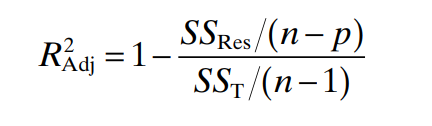

In [299]:
#y_test needs to be a np array so we can use the correct indices
y_test =np.array(y_test)

#Set to 0
SS_res = 0

#So we don't have to continously call len() function
length = len(y_test)

#Sum the square of the difference between real and predicted
for i in range(length):
    SS_res += (y_test[i] - y_hat[i])**2

#Set to 0
SS_total = 0

#Total will be used for calculating mean first
total = 0

for i in range(length):
    total += y_test[i]

mean = total/length

#Sum the square of the difference between real and average of our test data
for i in range (length):
    SS_total += (y_test[i] - mean)**2

print("SS_res:",SS_res)
print("SS_total:",SS_total)

#Calculate R^2 adjusted
R_adj = 1- ((SS_res/(length-11))/(SS_total/(length-1)))

print("Adjusted R^2:",R_adj)

#Calculate MSRes (a.k.a σ^2)

MS_res = SS_res/(length-11)

print("MS_res:",MS_res)

SS_res: 207313023173048.72
SS_total: 550948156853211.0
Adjusted R^2: 0.5853195796176915
MS_res: 2115439011969.8848


For the sake of ruling out overfitting, we will also calculate for training data

In [300]:
#New y_hat but for training data
y_hat_train = np.dot(X_train,beta)

for i in range(len(y_train)):
    
    print(f"y_hat = {y_hat_train[i]:.2f} | y_test = {y_train.iloc[i]:.2f}")


#y_test needs to be a np array so we can use the correct indices
y_train =np.array(y_train)

#Set to 0
SS_res_train = 0

#So we don't have to continously call len() function
length_train = len(y_train)

#Sum the square of the difference between real and predicted
for i in range(length_train):
    SS_res_train += (y_train[i] - y_hat_train[i])**2

#Set to 0
SS_total_train = 0

#Total will be used for calculating mean first
total_train = 0

for i in range(length_train):
    total_train += y_train[i]

mean_train = total_train/length_train

#Sum the square of the difference between real and average of our test data
for i in range (length_train):
    SS_total_train += (y_train[i] - mean_train)**2

print("SS_res_train:",SS_res_train)
print("SS_total_train:",SS_total_train)

#Calculate R^2 adjusted
R_adj_train = 1- ((SS_res_train/(length-11))/(SS_total_train/(length-1)))

print("Adjusted R^2_train:",R_adj_train)

#Calculate MSRes (a.k.a σ^2)

MS_res_train = SS_res_train/(length-11)

print("MS_res_train:",MS_res_train)

y_hat = 6683226.50 | y_test = 7525000.00
y_hat = 6257469.98 | y_test = 6300000.00
y_hat = 5051576.35 | y_test = 3920000.00
y_hat = 4194873.86 | y_test = 3430000.00
y_hat = 3446560.95 | y_test = 3010000.00
y_hat = 4504401.55 | y_test = 4620000.00
y_hat = 3472854.52 | y_test = 1750000.00
y_hat = 2950205.18 | y_test = 3010000.00
y_hat = 2451678.96 | y_test = 2520000.00
y_hat = 3750374.01 | y_test = 3710000.00
y_hat = 4451701.96 | y_test = 3703000.00
y_hat = 3697797.35 | y_test = 2450000.00
y_hat = 5099498.03 | y_test = 4200000.00
y_hat = 4125774.05 | y_test = 3640000.00
y_hat = 4295333.81 | y_test = 3640000.00
y_hat = 5126930.16 | y_test = 5383000.00
y_hat = 2478877.10 | y_test = 1767150.00
y_hat = 4988018.45 | y_test = 5250000.00
y_hat = 3567578.37 | y_test = 3500000.00
y_hat = 7492620.87 | y_test = 6790000.00
y_hat = 5899724.71 | y_test = 3920000.00
y_hat = 3481647.16 | y_test = 3920000.00
y_hat = 5428864.36 | y_test = 5810000.00
y_hat = 7371073.80 | y_test = 5250000.00
y_hat = 5977848.

We see that the model is clearly NOT overfitting, as our $R^2_A$ > $R^2_A (training)$

We can proceed with creating a residual plot

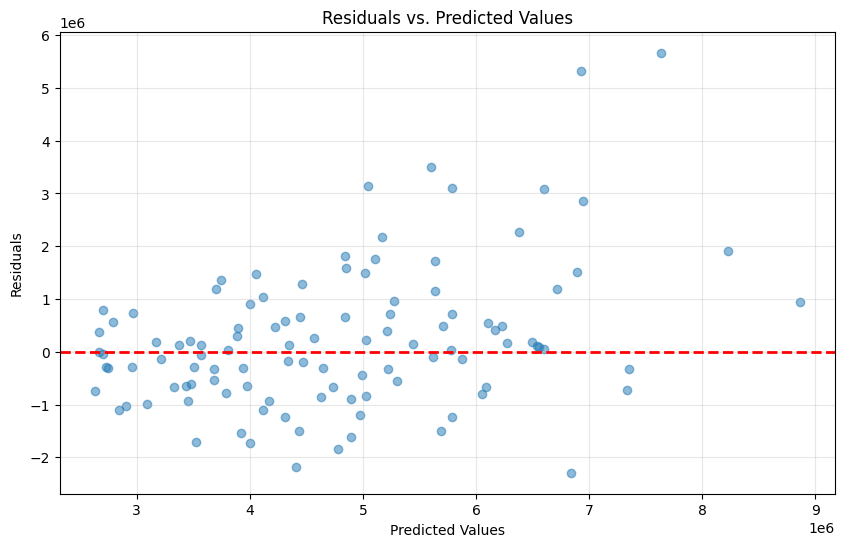

In [301]:
residuals = y_test - y_hat

plt.figure(figsize=(10, 6))

plt.scatter(y_hat, residuals, alpha=0.5)

plt.axhline(y=0, color='r', linestyle='--', linewidth=2)

plt.xlabel('Predicted Values')

plt.ylabel('Residuals')

plt.title('Residuals vs. Predicted Values')

plt.grid(True, alpha=0.3)

plt.show()

From this figure, we can see that the plot shows heteroscedasticity (slight funnel shape). This indicates that at higher house prices, the model becomes less reliable. To try and fix this, we introduce log transformation for the house price

In [302]:
y_log = np.log(y)

#We set our train/test split again (same 80-20 ratio) but this time we use y_log

ylog_train, ylog_test = np.log(y_train), np.log(y_test)

#Recalculate beta vector using y_log (following same formula)

p2 = np.dot(X_transpose,ylog_train)

#Calculate beta
beta_log = np.dot(p1,p2)

#Print beta
beta_log

#Print new multiple regression model where equation 2 corresponds to model built with beta vector from log transformation of y

equation2 = f"y = {beta_log[0]:.4f}"

for i in range(1, len(beta_log)):

    if beta_log[i] >= 0:

        equation2 += f" + {beta_log[i]:.4f}*x{i}"

    else:

        equation2 += f" - {abs(beta_log[i]):.4f}*x{i}"

equation2

'y = 14.3755 + 0.0001*x1 + 0.0531*x2 + 0.1022*x3 + 0.1030*x4 + 0.0558*x5 + 0.1184*x6 + 0.1454*x7 + 0.1638*x8 + 0.0480*x9 + 0.1126*x10 + 0.0609*x11'

(With log-transformation) $y = 14.3755 + 0.0001 x_1 + 0.0531 x_2 + 0.1022 x_3 + 0.1030 x_4 + 0.0558 x_5 + 0.1184 x_6 + 0.1454 x_7 + 0.1638 x_8 + 0.0480 x_9 + 0.1126 x_{10} + 0.0609 x_{11}$


(Original) $y$ = $304141.9027$ + $262.9358x_1$ + $262020.7118x_2$ + $525339.1767x_3$  + $319669.4186x_4$ + $237609.8789x_5$ + $494253.4993x_6$ + $763918.4304x_7$ + $843419.3297x_8$ + $286386.3113x_9$  + $553806.1959x_{10}$ + $232288.0388x_{11}$


Notice the difference in the interpretation of these two. The original model's $B_0$ implies that the house price (considering none of the features are present) is 304,141.90. In our new log-transformation based model, $B_0$ is 14.36. This is because how the log function scales our coefficients. Now, we test the new model

In [303]:
#Make predictions
ylog_hat = np.dot(X_test,beta_log)

#Transformn predictions back to normal scale
y_hat = np.exp(ylog_hat)

y_test_original = np.exp(ylog_test)

for i in range(len(y_test_original)):
    
    print(f"y_hat = {y_hat[i]:.2f} | y_test = {y_test_original[i]:.2f}")

y_hat = 4279409.50 | y_test = 4060000.00
y_hat = 6484640.15 | y_test = 6650000.00
y_hat = 3142651.81 | y_test = 3710000.00
y_hat = 4548019.43 | y_test = 6440000.00
y_hat = 3507492.88 | y_test = 2800000.00
y_hat = 3590464.45 | y_test = 4900000.00
y_hat = 5781323.19 | y_test = 5250000.00
y_hat = 5762074.14 | y_test = 4543000.00
y_hat = 2837004.53 | y_test = 2450000.00
y_hat = 2961045.51 | y_test = 3353000.00
y_hat = 8751720.51 | y_test = 10150000.00
y_hat = 2940406.29 | y_test = 2660000.00
y_hat = 3089522.03 | y_test = 3360000.00
y_hat = 3547720.30 | y_test = 3360000.00
y_hat = 3873652.97 | y_test = 2275000.00
y_hat = 3223986.42 | y_test = 2660000.00
y_hat = 3126515.38 | y_test = 2660000.00
y_hat = 4732065.24 | y_test = 7350000.00
y_hat = 4486725.93 | y_test = 2940000.00
y_hat = 3484146.70 | y_test = 2870000.00
y_hat = 5881906.49 | y_test = 6720000.00
y_hat = 6021805.26 | y_test = 5425000.00
y_hat = 2896630.06 | y_test = 1890000.00
y_hat = 4766732.89 | y_test = 5250000.00
y_hat = 5376930

Now, we can calculate our new $R^2_A$ for the new model to test its adequacy

In [304]:
#Set to 0
SS_res = 0

#So we don't have to continously call len() function
length = len(ylog_test)

#Sum the square of the difference between real and predicted
for i in range(length):
    
    SS_res += (ylog_test[i] - ylog_hat[i])**2

#Set to 0
SS_total = 0

#Total will be used for calculating mean first
total = 0

for i in range(length):

    total += ylog_test[i]

mean = total/length

#Sum the square of the difference between real and average of our test data
for i in range (length):

    SS_total += (ylog_test[i] - mean)**2


print("SS_res_log-transformed:",SS_res)

print("SS_total_log-transformed:",SS_total)

#Calculate R^2 adjusted
R_adj = 1- ((SS_res/(length-11-1))/(SS_total/(length-1)))

print("Adjusted R^2 (log-transformed):",R_adj)

#Calculate MSRes (a.k.a σ^2)

MS_res = SS_res/(length-11-1)

print("MS_res_log-transformed:",MS_res)

SS_res_log-transformed: 7.387722615132568
SS_total_log-transformed: 21.046671876739563
Adjusted R^2 (log-transformed): 0.6091778481519894
MS_res_log-transformed: 0.07616208881579967


Our new $R^2_A$ obtained using this method resulted in our most signifiant model yet. Now, we plot the residuals

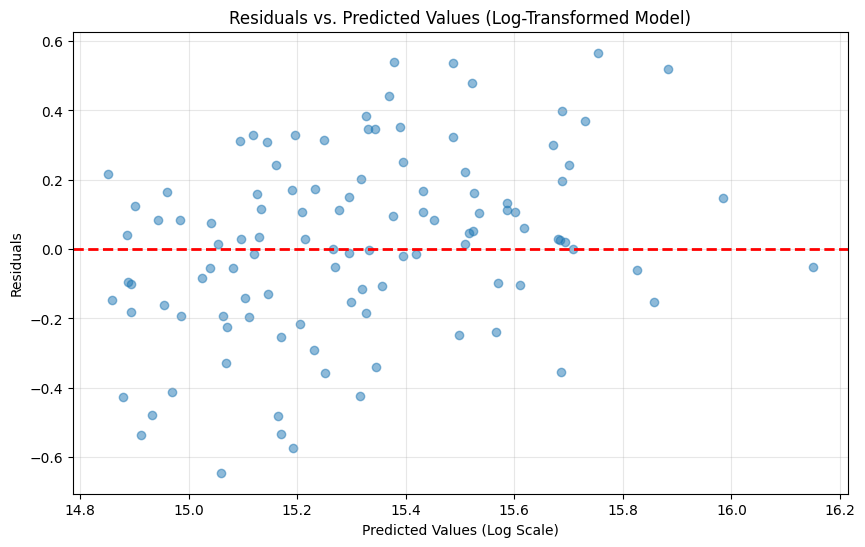

In [305]:
residuals = ylog_test - ylog_hat

plt.figure(figsize=(10, 6))

plt.scatter(ylog_hat, residuals, alpha=0.5)

plt.axhline(y=0, color='r', linestyle='--', linewidth=2)

plt.xlabel('Predicted Values (Log Scale)')

plt.ylabel('Residuals')

plt.title('Residuals vs. Predicted Values (Log-Transformed Model)')

plt.grid(True, alpha=0.3)

plt.show()

Looking at this residual plot, we can see that we no longer have that funnel shape we had from our original model. However, the very slight increase in the $R^2_A$ from log-transforming our response variable (price) actually displays that heteroscedasticity wasn't severely hindering the model

With this, we have a current model that uses log transformation to secure a $R^2_A$ of 0.609, meaning that the model can explain ~ 61% of variance in the dependent variable. This is decent, but implies that we have more room to improve by some means. 

An important remark worth noting is the possibility that a feature's effect depends on another feature's value. In housing prices, we can make some logical assumptions about the relation between certain features and see if adding them in the model improves the performance of the model. These are known as interaction terms

In [306]:
#We first list the most reasonable feasible interaction terms

interaction1 = X['area'] * X['bedrooms']

interaction2 = X['area'] * X['stories']

interaction3 = X['area'] * X['airconditioning']

interaction4 = X['bedrooms'] * X['basement']

In [307]:
X.loc[:, "interaction1"] = list(interaction1)

X.loc[:, "interaction2"] = list(interaction2)

X.loc[:, "interaction3"] = list(interaction3)

X.loc[:, "interaction4"] = list(interaction4)

X

,intercept,area,bedrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,interaction1,interaction2,interaction3,interaction4
0,1,7420,4,3,1,0,0,0,1,2,1,2,29680,22260,7420,0
1,1,8960,4,4,1,0,0,0,1,3,0,2,35840,35840,8960,0
2,1,9960,3,2,1,0,1,0,0,2,1,1,29880,19920,0,3
3,1,7500,4,2,1,0,1,0,1,3,1,2,30000,15000,7500,4
4,1,7420,4,2,1,1,1,0,1,2,0,2,29680,14840,7420,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1,3000,2,1,1,0,1,0,0,2,0,0,6000,3000,0,2
541,1,2400,3,1,0,0,0,0,0,0,0,1,7200,2400,0,0
542,1,3620,2,1,1,0,0,0,0,0,0,0,7240,3620,0,0
543,1,2910,3,1,0,0,0,0,0,0,0,2,8730,2910,0,0


Rebuild Beta vector for new model with interaction terms and print equation

In [308]:
y_log = np.log(y)

X_train, X_test, ylog_train, ylog_test = train_test_split(X,y_log,test_size=0.2,random_state=42)

X_transpose = X_train.T

X_mult_X_transpose = np.dot(X_transpose, X_train)

p1 = inv(X_mult_X_transpose)

p2 = np.dot(X_transpose,ylog_train)

beta_interaction = np.dot(p1,p2)

# Build equation
equation = f"y = {beta_interaction[0]:.4f}"

for i in range(1, len(beta_interaction)):

    if beta_interaction[i] >= 0:

        equation += f" + {beta_interaction[i]:.4f}*x{i}"

    else:

        equation += f" - {abs(beta_interaction[i]):.4f}*x{i}"

equation

'y = 14.5365 + 0.0000*x1 + 0.0253*x2 + 0.0586*x3 + 0.1068*x4 + 0.0504*x5 + 0.1742*x6 + 0.1545*x7 + 0.1368*x8 + 0.0468*x9 + 0.1156*x10 + 0.0612*x11 + 0.0000*x12 + 0.0000*x13 + 0.0000*x14 - 0.0177*x15'

$y$ = $14.5365$ + $0.0000x_1$ + $0.0253x_2$ + $0.0586x_3$ + $0.1068x_4$ + $0.0504x_5$ + $0.1742x_6$ + $0.1545x_7$ + $0.1368x_8$ + $0.0468x_9$ + $0.1156x_{10}$ + $0.0612x_{11}$ + $0$.0000x_{12}$ + $0.0000x_{13}$ + $0.0000x_{14}$ - $0.0177x_{15}$

Test the multiple regression model with interaction terms

In [309]:
#Make predictions

ylog_hat_interaction = np.dot(X_test,beta_interaction)

#Transformn predictions back to normal scale

y_hat = np.exp(ylog_hat_interaction)

y_test_original = np.exp(ylog_test)

Test new model Assess adequacy of model with interaction terms

In [310]:
ylog_test = np.array(ylog_test)

SS_res = 0

length = len(ylog_test)

for i in range(length):

    SS_res += (ylog_test[i] - ylog_hat[i])**2

SS_total = 0

total = 0

for i in range(length):

    total += ylog_test[i]

mean = total/length

for i in range(length):
    
    SS_total += (ylog_test[i] - mean)**2

print("SS_res (interaction term):",SS_res)

print("SS_total (interaction term):",SS_total)

R_adj = 1- ((SS_res/(length-17))/(SS_total/(length-1)))

print("Adjusted R^2 (interaction term):",R_adj)

MS_res = SS_res/(length-17)

print("MS_res (interaction term):",MS_res)

SS_res (interaction term): 7.387722615132568
SS_total (interaction term): 21.046671876739563
Adjusted R^2 (interaction term): 0.5879375138124235
MS_res (interaction term): 0.08030133277318009


Interaction terms resulted in a lower $R^2_{Adj}$, so we can remove them and stick to our original multiple regression with log-transformed response variables

In [311]:
X.drop(columns=['interaction1', 'interaction2', 'interaction3', 'interaction4'], inplace=True)

Before we choose to further optimize the model, we check for multicollinearity to see if either lasso or ridge regression should be used

In [312]:
#Calculate VIF for each feature to check for multicollinearity

for columns in range(len(X.columns)):

    curr = X.columns[columns]

    X_temp = X.drop(columns=[curr])

    y_temp = X[curr]
    
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp,y_temp,test_size=0.2,random_state=42)

    X_transpose_temp = np.transpose(X_train_temp)

    X_mult_X_transpose_temp = np.dot(X_transpose_temp, X_train_temp)

    p1_temp = inv(X_mult_X_transpose_temp)

    p2_temp = np.dot(X_transpose_temp,y_train_temp)

    beta_temp = np.dot(p1_temp,p2_temp)

    y_hat_temp = np.dot(X_test_temp,beta_temp)

    SS_res_temp = 0

    length_temp = len(y_test_temp)

    for i in range(length_temp):

        SS_res_temp += (y_test_temp.iloc[i] - y_hat_temp[i])**2

    total_temp = 0

    for i in range(length_temp):

        total_temp += y_test_temp.iloc[i]

    mean_temp = total_temp/length_temp

    SS_total_temp = 0

    for i in range (length_temp):

        SS_total_temp += (y_test_temp.iloc[i] - mean_temp)**2

    R_squared = 1- (SS_res_temp/SS_total_temp)

    VIF = 1/(1-R_squared)

    print(f"VIF for {curr}: {VIF}")

VIF for intercept: 0.0
VIF for area: 1.3563064821184956
VIF for bedrooms: 1.303189675905326
VIF for stories: 1.1862274904310222
VIF for mainroad: 1.1014509694012398
VIF for guestroom: 1.0062021419118408
VIF for basement: 1.0509227205280256
VIF for hotwaterheating: 0.9984411569088625
VIF for airconditioning: 0.9988526258531134
VIF for parking: 1.1884997357363702
VIF for prefarea: 1.1417751165459527
VIF for furnishingstatus: 1.0110612105185435


C:\Users\naik_\AppData\Local\Temp\ipykernel_3476\3033884808.py:47: RuntimeWarning: divide by zero encountered in scalar divide
  R_squared = 1- (SS_res_temp/SS_total_temp)


From this, we can see that there is absolutely no multicollinearity amongst our predictors. In this instance, we can proceed with using a Lasso regression

In [ ]:
X_np = X.values

y_np = y.values

n, p = X_np.shape

X_mean = X_np.mean(axis=0)

X_std = X_np.std(axis=0)

X_std[X_std == 0] = 1 

X_scaled = (X_np - X_mean) / X_std

y_mean = y_np.mean()

y_centered = y_np - y_mean

beta = np.zeros(p)

lambda_val = 0.05

tol = 1e-6

max_iter = 1000

for _ in range(max_iter):

    beta_old = beta.copy()

    for j in range(p):

        r_j = y_centered - np.dot(X_scaled, beta) + X_scaled[:, j] * beta[j]

        rho = (X_scaled[:, j] @ r_j) / n

        if rho > lambda_val:

            beta[j] = rho - lambda_val

        elif rho < -lambda_val:

            beta[j] = rho + lambda_val

        else:

            beta[j] = 0.0

 
    if np.max(np.abs(beta - beta_old)) < tol:

        break


y_hat = np.dot(X_scaled, beta) + y_mean

SS_res = np.sum((y_np - y_hat) ** 2)

SS_tot = np.sum((y_np - y_np.mean()) ** 2)

R2 = 1 - SS_res / SS_tot

print("R^2 (LASSO):", R2)

for name, coef in zip(X.columns, beta):

    print(f"{name}: {coef}")

R^2 (LASSO): 0.6252165775392744
intercept: 0.0
area: 578366.9957414741
bedrooms: 202343.5486437449
stories: 500050.1552152961
mainroad: 126046.18797321295
guestroom: 135481.70553326732
basement: 216494.29611202315
hotwaterheating: 207556.44907400347
airconditioning: 419467.0135294296
parking: 283514.98357089487
prefarea: 263153.2063411982
furnishingstatus: 184431.73124145085


Note: With Lasso, we see that despite all of the predictors being significant:



-> mainroad and guestroom have shown to be the "weakest" ones



-> area, stories, parking, airconditioning, and basement are stronger predictors



-> LASSO regressions concept of shrinking coefficients proved more valuable than removing predictors



-> We obtained our best result from this method, 62.5% of the variability in house prices can be explained by these predictors